# Estimating Prediction Error and Validation Set Approach (25)

**Cross-validation** and **bootstrap** are two ways to **resample** the data.

* The purpose of this is to refit the model in light of new information.
* CV gets a good idea of how well the trained data will to on the test data, Bootstrap will test SD and bias.

Recall:

* **test error** or **variance** is how poorly the data will do on new data
* **training error** or **bias** is how poorly the model 
* You want as many variables as test error will be at its low. Otherwise you **overfit**.
* We look at things like **Cp statistic, AIC, and BIC** but for these lectures we will look at **cross-validation**.


### Validation-set approach

* We randomly divide the available data into a **training, validation, and test-set.**
    * These guys use 50/50 split for training and cv, but I've been recommended to use 75/25. However there are weaknesses in validation...

# K-fold Cross Validation (26)

The idea is to **randomly divide the data into K equal-sized parts**. We leave out part k, and fit the model to the other k-1 parts. The best choice of k = 5 (like the 80/20 split).

Let the K parts be $C_{1}, C_{2}, ... C_{K}$ which denote the indices of the observations in part k. There are $n_{k}$ observations in park k: if N is a multiple of K, then $n_{k} = n / K$.

Compute:

$$ \text{CV}_{K} = \sum_{k = 1}^{K} \dfrac {n_{k}}{n}\text{MSE}_{k}$$

Where $\text{MSE}_{k} = \sum_{i \in C_{k}}(y_{i} - \hat{y_{i}})^ 2 / n_{k} $ and $\hat{y}_{i}$ is the fit for the observation i, obtained from the data with part k removed.
* Setting K = n yields n-fold or **leave-one out cross-validation (LOOCV)**

### LOOCV

This is a special case because it has the form:

$$ \text{CV}_{(n)} = \dfrac {1} {n} \sum_{i = 1}^{n} \big( \dfrac{y_{i} - \hat{y}_{i}} {1 - h_{i}} \big) ^ 2 $$

This sees how a single observation punishes/affirms the data. However LOOCV isn't very useful because it has low bias, but high variance. As a result K = 5/10 is a better choice.

### Logistic Reg

Same thing:

$$ \text{CV}_{K} = \sum_{k = 1} ^ {K} \dfrac {n_{k}}{n} \text{Err}_{k}$$

* Err is the misclassification error = $\sum_{i \in C_{k}} I(y_{k} \ne \hat{y_{i}}) / n_{k} $.

# Cross-Validation: The Right and Wrong Ways (27)

Example (more predictors than samples):

1. Starting with 5000 redictors and 50 samples, find the 100 predictors having the largest correlation with the class labels.
2. We then apply a classifier such as logistic regression, using only these 100 predictors.

How do we estimate the test set performance of this classifier? *Can we apply cross-validation in step 2, forgetting about step 1?*

### No

This is an error because the training data has already seen all the 5000 labels of all the samples, which is training. We can't ignore this in the validation process.

### Right way

Apply CV to step 1 and 2

# The Bootstrap (28)

The **bootstrap** is a flexible and powerful statistical tool that can be used to quantify the uncertainty associated with a given estimator or statistical learning method

* Made by bradely Efron
* You are pulling yourself up from your bootstraps

Example:

* Suppose you have money that will yield returns of X and Y. We will invest $\alpha$ in X and $1-\alpha$ in Y.
* We want to choose $\alpha$ that minimizes total risk (variance) of investment such that we minimize $\text{Var}(\alpha X + (1 - \alpha)Y)$
* The formula that does this is:

$$ \alpha = \dfrac {\sigma_{Y}^2 - \sigma_{XY}} {\sigma_{X}^2 + \sigma_{Y}^2 - 2 \sigma_{XY}} $$

for $\sigma_{X}^2 = \text{Var}(X),\sigma_{Y}^2 = \text{Var}(Y),\sigma_{XY} = \text{Cov}(X, Y)$

The bootstrap tries to sample through the data itself **with replacement**
* Each observation can appear more than once or not at all.

# More on the Bootstrap (29)

In the bootstrap world, if we don't have access to the population we replace it with an estimated population (**empirical distribution function**) which samples with replacement.

* In time series, we can't simply sample from all the observations with replacement, but have to use time blocks.
    * We must figure out which parts of the data are independent.
    * Between blocks we can assume things are independent.
    
Another use of the bootstrap is to estimate confidence intervals:

* You can take 95-percentiles of $\alpha$ histograms to derive a confidence interval of what $\alpha$ should be.

In cross-validation, each of the K validation folds is distinct from the other K - 1 folds used for training: **there is no overlap**. This is crucial for its success.

* With bootstrap, however, there is an overlap with the bootstrap sample and the original data.
    * There is a 2/3 overlap because with replacement K - 1 / K will result in 2/3.
    * Thus it underestimates the true prediction error
    
Therefore **cross-validation** is prefered.

# R-Lab, CV, LOOCV (30)

In [14]:
require(ISLR)
require(boot)
?cv.glm
# a general cross validation package on generalized linaer model

cv.glm {boot},R Documentation
data,"A matrix or data frame containing the data. The rows should be cases and the columns correspond to variables, one of which is the response."
glmfit,"An object of class ""glm"" containing the results of a generalized linear model fitted to data."
cost,A function of two vector arguments specifying the cost function for the cross-validation. The first argument to cost should correspond to the observed responses and the second argument should correspond to the predicted or fitted responses from the generalized linear model. cost must return a non-negative scalar value. The default is the average squared error function.
K,The number of groups into which the data should be split to estimate the cross-validation prediction error. The value of K must be such that all groups are of approximately equal size. If the supplied value of K does not satisfy this criterion then it will be set to the closest integer which does and a warning is generated specifying the value of K used. The default is to set K equal to the number of observations in data which gives the usual leave-one-out cross-validation.
call,The original call to cv.glm.
K,The value of K used for the K-fold cross validation.
delta,A vector of length two. The first component is the raw cross-validation estimate of prediction error. The second component is the adjusted cross-validation estimate. The adjustment is designed to compensate for the bias introduced by not using leave-one-out cross-validation.
seed,The value of .Random.seed when cv.glm was called.


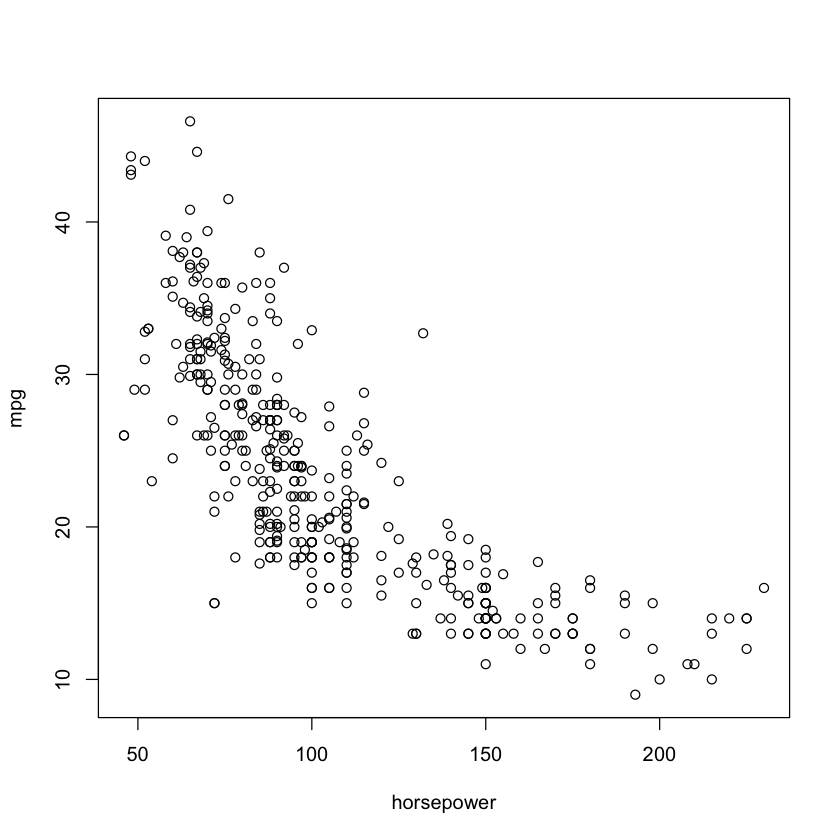

In [16]:
plot(mpg ~ horsepower, data = Auto)

In [18]:
## LOOCV
glm.fit = glm(mpg ~ horsepower, data = Auto)
cv.glm(Auto, glm.fit)$delta
# runs cross validation on data with fit.
# this is slow
# delta is cv prediction error
# 1st number is loocv result, and the 2nd is the bias

[1] 24.23151 24.23114

The above is slow because it doesn't use the simple formula:

$$ \dfrac {1} {n} \sum (y_{i} - \hat{y}_{-i}) ^ 2 $$

$$ = \dfrac {1} {n} \sum {i = 1}^{n} \dfrac {(y_{i} - \hat{y}_{i}) ^ 2} {(1 - H_{ii})^2)} $$

Where $H_{ii}$ is the influence observation i contributes to its own fit. Let's make a function that will calculate the influences:

In [19]:
l

In [21]:
loocv(glm.fit)
#notice this is a lot faster!

[1] 24.23151

In [23]:
cv.error = rep(0, 5)
# a vector of 5 zeros.
degree = 1:5

In [24]:
for (d in degree) {
    glm.fit = glm(mpg ~ poly(horsepower, d), data = Auto)
    cv.error[d] = loocv(glm.fit)
}

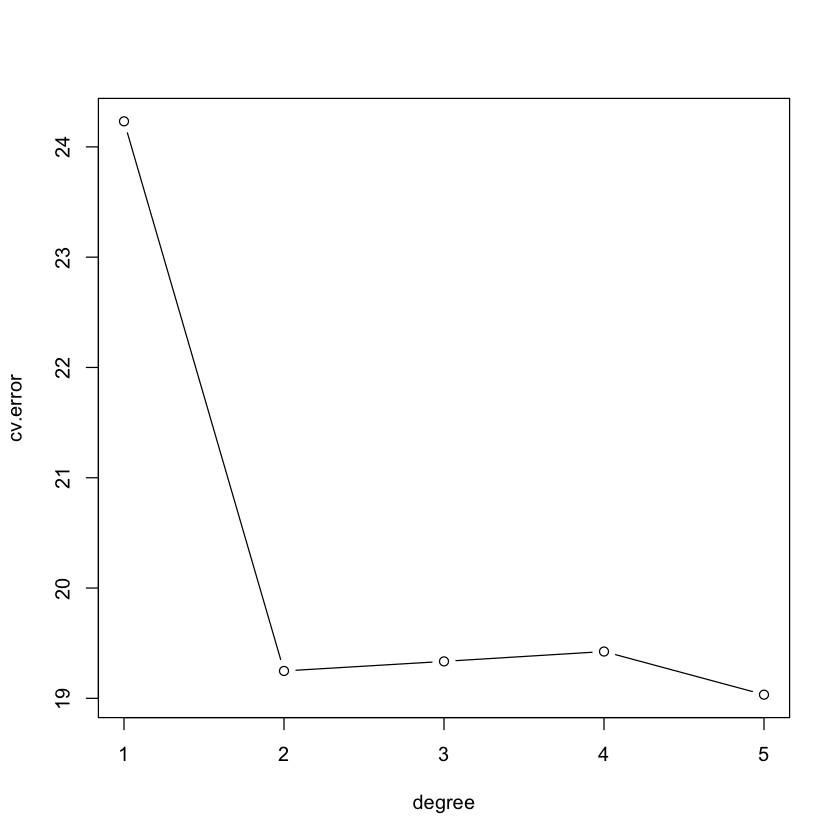

In [26]:
plot(degree, cv.error, type = "b")
# 2 degrees would do a good job of plotting the data.

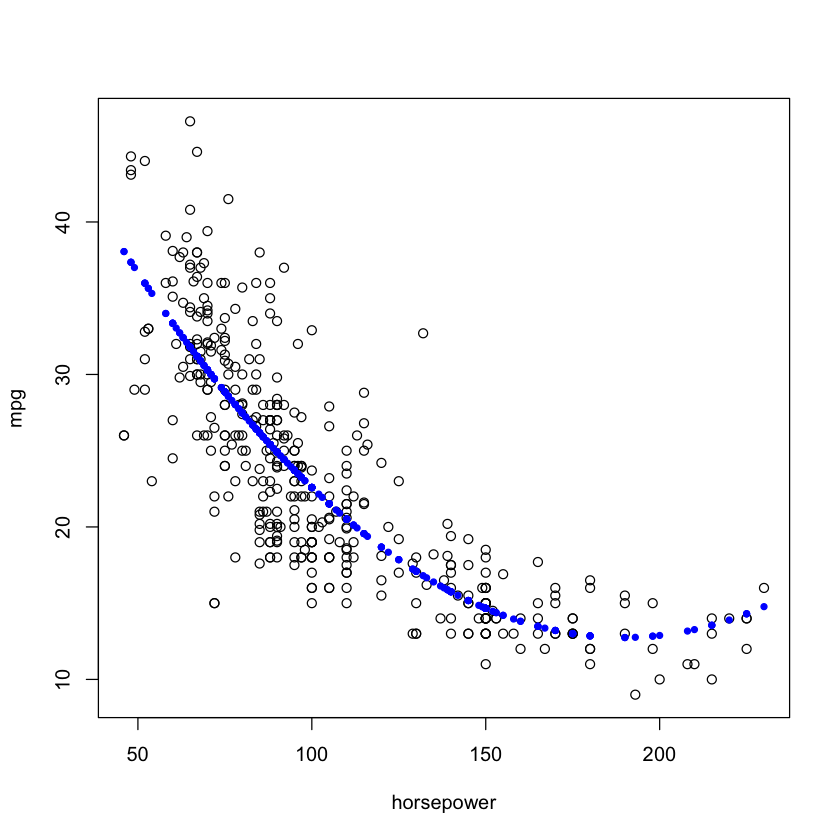

In [53]:
plot(mpg ~ horsepower, data = Auto)
glm.fit = glm(mpg ~ poly(horsepower, 2), data = Auto)
points(x = Auto$horsepower, fitted(glm.fit), col = "blue", pch = 20)

# R-lab, Bootstrap (31)

In [32]:
alpha = function (x, y) {
    vx = var(x)
    vy = var(y)
    cxy = cov(x, y)
    (vy - cxy) / (vx + vy - 2*cxy)
}

In [34]:
alpha(Portfolio$X, Portfolio$Y)

[1] 0.5758321

In [35]:
# What is the SE of alpha?

alpha.fn = function(data, index) {
    # index is row of dataframe
    with (data[index, ], alpha(X,Y))
    # with allows for lexical scoping
}

In [37]:
alpha.fn(Portfolio, 1:100)

[1] 0.5758321

In [38]:
set.seed(1)
alpha.fn (Portfolio, sample(1:100, 100, replace = TRUE))

[1] 0.5963833

In [40]:
boot.out = boot(Portfolio, alpha.fn, R = 1000)
boot.out


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = Portfolio, statistic = alpha.fn, R = 1000)


Bootstrap Statistics :
     original      bias    std. error
t1* 0.5758321 0.002705445  0.09197062

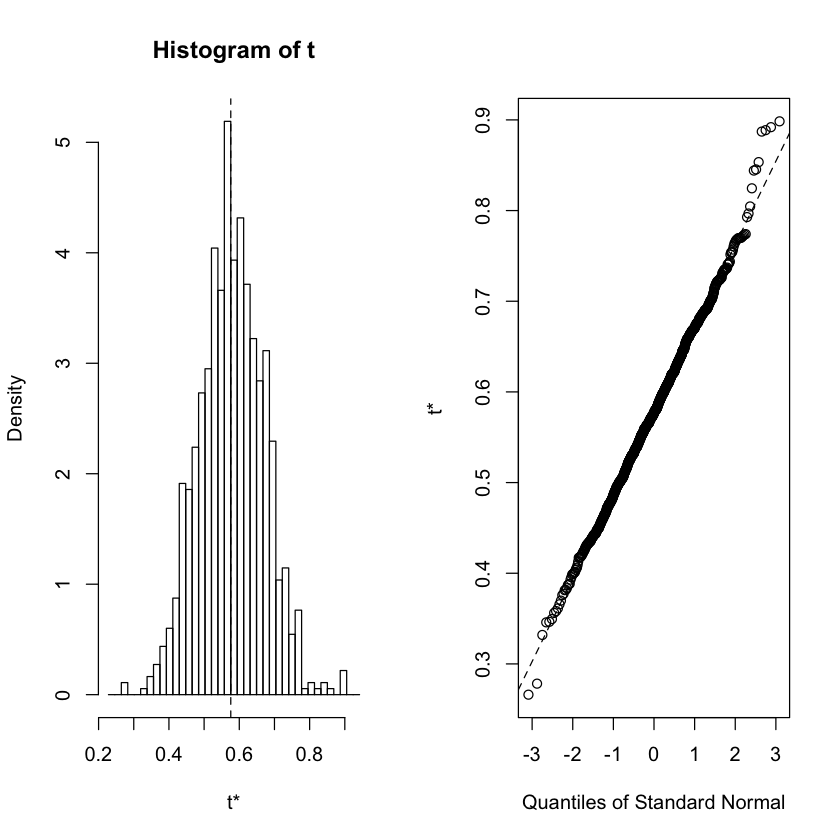

In [41]:
plot (boot.out)